In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
sns.set(style='white')

In [4]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

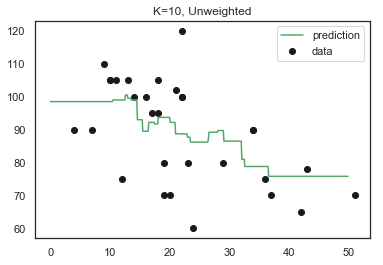

In [11]:
knn = KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

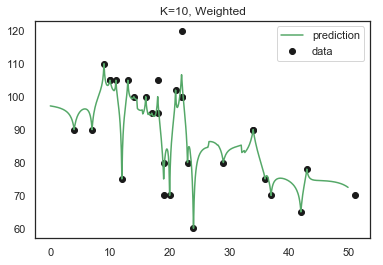

In [12]:
knn_w = KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [16]:
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: {:0.2f} (+/- {:0.2f})'.format(score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: {:0.2f} (+/- {:0.2f})'.format(score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


Adding the additional feature to see if we can improve on the model.

In [22]:
T = np.arange(0, 50, 0.1)
T[:,np.newaxis]

array([[ 0. ],
       [ 0.1],
       [ 0.2],
       [ 0.3],
       [ 0.4],
       [ 0.5],
       [ 0.6],
       [ 0.7],
       [ 0.8],
       [ 0.9],
       [ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6

In [29]:
knn_w = KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music[['loudness', 'duration']])
Y = music.bpm
knn_w.fit(X, Y)

score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: {:0.2f} (+/- {:0.2f})'.format(score_w.mean(), score_w.std() * 2))

Weighted Accuracy: -0.26 (+/- 0.74)


In [36]:
knn = KNeighborsRegressor()
params = {
    'n_neighbors':Integer(2, 10),
    'weights':Categorical(['uniform', 'distance']),
    'algorithm':Categorical(['auto', 'ball_tree', 'kd_tree', 'brute'])
}

knn_opt = BayesSearchCV(
    knn,
    params,
    cv=5,
    random_state=654,
    n_iter=30
)

knn_opt.fit(X, Y)

print('Best parameters from Bayesian Search CV:\n{}'.format(knn_opt.best_params_))
print('\nR-squared from previously defined parameters, ', knn_opt.score(X, Y))

Best parameters from Bayesian Search CV:
{'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'distance'}

R-squared from previously defined parameters,  0.9928822245420897


Using Bayesian Search methods I was able to vastly overfit the model to 0.9928 R-squared with both features. This is a major improvement from the 0.11 R-squared that was from a single feature in the knn_w model. However, the overfitting is quite apparent and probably isn't a good thing.